In [11]:
import importlib

from wishart import wishart_lib
from indexes import indexes_lib
from generator import generator_lib

importlib.reload(wishart_lib)
importlib.reload(indexes_lib)
importlib.reload(generator_lib)

import numpy as np
from matplotlib import pyplot as plt

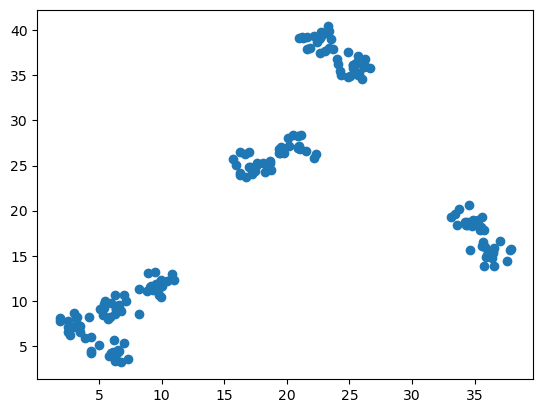

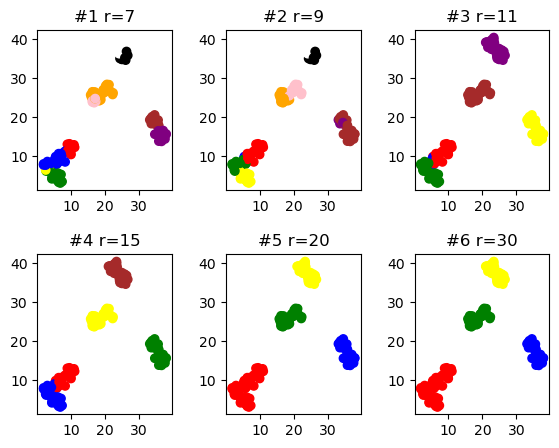

  id       CH      D      S     DB     XB
----  -------  -----  -----  -----  -----
   1  1971.11  0.006  0.483  0.687  0.304
   2  1757.65  0.02   0.434  0.771  0.495
   3  1955.96  0.036  0.577  0.571  0.488
   4  2361.25  0.043  0.69   0.479  0.15
   5  1875.25  0.687  0.795  0.292  0.056
   6  1875.25  0.687  0.795  0.292  0.056


In [12]:
generator = generator_lib.Generator()
res = generator.generate_with_subclusters()

arr = np.array(res)
xs = arr[:, 0]
ys = arr[:, 1]
plt.scatter(xs, ys)
plt.show()

tester = indexes_lib.Tester()

fig, axs = plt.subplots(2, 3)
ind = 0

for r in [7, 9, 11, 15, 20, 30]:
    wishart = wishart_lib.Wishart(r, 0.2)
    w = wishart.fit(arr)
    colour_pool = ['red', 'blue', 'green', 'yellow', 'brown', 'purple', 'orange', 'pink', 'white', 'black', 'cyan']

    tester.add_test(arr, w)

    clean_data, clean_w = indexes_lib.cleaning(arr, w)
    colours = [colour_pool[i] for i in clean_w]

    axs[ind // 3, ind % 3].scatter(clean_data[:, 0], clean_data[:, 1], c=colours)
    axs[ind // 3, ind % 3].set_title('#{} r={}'.format(ind+1, r))
    ind += 1

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


tester.display()




In [10]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

print(color.BOLD + 'Hello, World!' + color.END)

Hello, World!
